In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
os.chdir("C:\\Users\\Milica\\Desktop\\Modeling Seminar")

In [3]:
data = pd.read_csv('imports-85.data', skiprows=0, dtype={'NumOfDoors':str}, names=['Symboling','NormalizedLosses','Make','FuelType','Aspiration','NumOfDoors','BodyStyle','DriveWheels','EngineLocation','WheelBase','Length','Width','Height','CurbWeight','EngineType','NumOfCylinders','EngineSize','FuelSystem','Bore','Stroke','CompressionRatio','HorsePower','PeakRpm','CityMpg','HighwayMpg','Price'],na_values='?')

# Clearing data set

In [4]:
data['NormalizedLosses'].fillna(value=data['NormalizedLosses'].mean(), inplace=True)
#data['NumOfDoors'].fillna(value=data['NumOfDoors'].mean(), inplace=True) STRING
data.dropna(subset = ["Bore"], inplace=True)
data.dropna(subset = ["Stroke"], inplace=True)
data['HorsePower'].fillna(value=data['HorsePower'].mean(), inplace=True)
data['PeakRpm'].fillna(value=data['PeakRpm'].mean(), inplace=True)
data.dropna(subset = ["Price"], inplace=True)
data = data.fillna({"NumOfDoors": "four"})

In [5]:
pd.DataFrame(data)

,Symboling,NormalizedLosses,Make,FuelType,Aspiration,NumOfDoors,BodyStyle,DriveWheels,EngineLocation,WheelBase,...,EngineSize,FuelSystem,Bore,Stroke,CompressionRatio,HorsePower,PeakRpm,CityMpg,HighwayMpg,Price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [6]:
data.describe()

,Symboling,NormalizedLosses,WheelBase,Length,Width,Height,CurbWeight,EngineSize,Bore,Stroke,CompressionRatio,HorsePower,PeakRpm,CityMpg,HighwayMpg,Price
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.796954,121.431472,98.868020,174.306599,65.892893,53.851269,2558.598985,127.979695,3.330711,3.256904,10.179797,103.280718,5099.571461,25.350254,30.842640,13210.928934
std,1.228651,32.067557,6.107142,12.424630,2.122631,2.398461,522.081506,41.223997,0.270793,0.319256,4.044123,37.676125,465.876862,6.373107,6.794401,8023.582040
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,98.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,20.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10198.000000
75%,2.000000,134.000000,102.400000,183.500000,66.900000,55.600000,2935.000000,145.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
print(data.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      197.000000
mean     13210.928934
std       8023.582040
min       5118.000000
25%       7775.000000
50%      10198.000000
75%      16503.000000
85%      18540.000000
90%      22532.000000
100%     45400.000000
max      45400.000000
Name: Price, dtype: float64


In [8]:
#View total of null values by column
#data.isnull().sum()

In [9]:
#As there are numbers, let us convert these numbers into numeric form.
def number_(x):
    return x.map({'four':4, 'two': 2})
    
data['NumOfDoors'] = data[['NumOfDoors']].apply(number_)

# Data analysis

In [10]:
#rechecking
data['NumOfDoors'].value_counts()

4    115
2     82
Name: NumOfDoors, dtype: int64

In [11]:
#BodyStyle- body of car
data['BodyStyle'].value_counts()

sedan          94
hatchback      64
wagon          25
hardtop         8
convertible     6
Name: BodyStyle, dtype: int64

In [12]:
#drivewheel - type of drive wheel
data['DriveWheels'].value_counts()

fwd    118
rwd     71
4wd      8
Name: DriveWheels, dtype: int64

In [13]:
#enginelocation - Location of car engine
data['EngineLocation'].value_counts()

front    194
rear       3
Name: EngineLocation, dtype: int64

In [14]:
#wheelbase - Weelbase of car 
data['WheelBase'].value_counts().head()

93.7    20
94.5    19
95.7    13
96.5     8
97.3     7
Name: WheelBase, dtype: int64

In [15]:
#enginetype - Type of engine.
data['EngineType'].value_counts()

ohc     145
ohcf     15
ohcv     13
l        12
dohc     12
Name: EngineType, dtype: int64

In [16]:
#cylindernumber- cylinder placed in the car
data['NumOfCylinders'].value_counts()

four      157
six        24
five       10
eight       4
three       1
twelve      1
Name: NumOfCylinders, dtype: int64

In [17]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

data['NumOfCylinders'] = data[['NumOfCylinders']].apply(convert_number)

In [18]:
#re-checking
data['NumOfCylinders'].value_counts()

4     157
6      24
5      10
8       4
12      1
3       1
Name: NumOfCylinders, dtype: int64

In [19]:
#fuelsystem - Fuel system of car
data['FuelSystem'].value_counts()

mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
spfi     1
mfi      1
Name: FuelSystem, dtype: int64

# Visualizing data

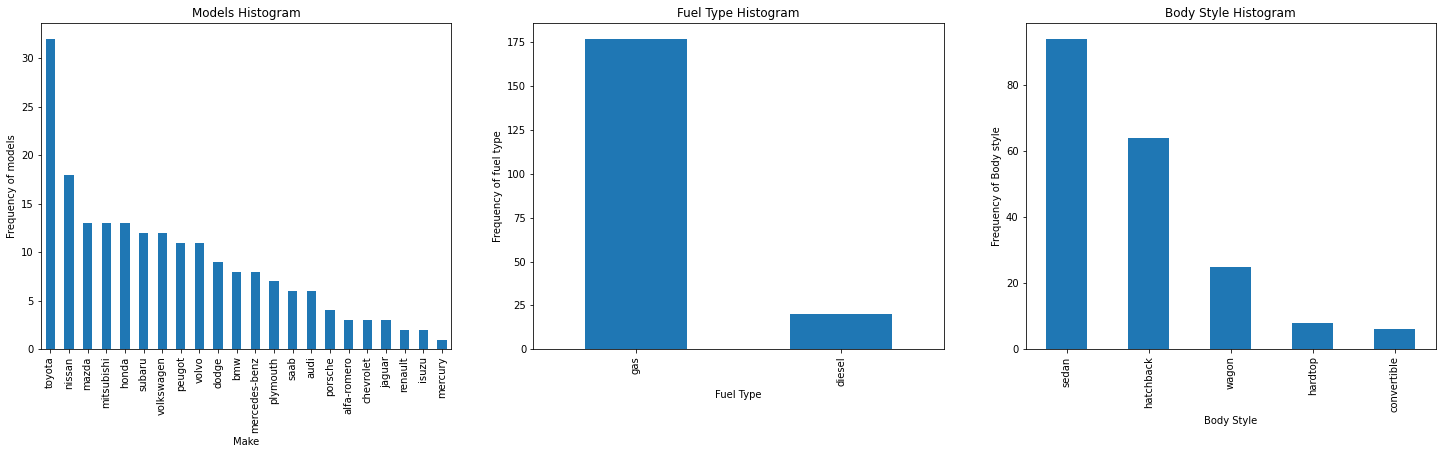

In [20]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.Make.value_counts().plot(kind = 'bar')
plt.title('Models Histogram')
plt1.set(xlabel = 'Make', ylabel='Frequency of models')

plt.subplot(1,3,2)
plt1 = data.FuelType.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.BodyStyle.value_counts().plot(kind = 'bar')
plt.title('Body Style Histogram')
plt1.set(xlabel = 'Body Style', ylabel='Frequency of Body style')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


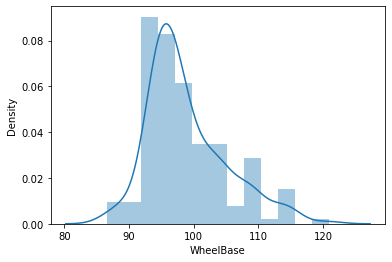

In [21]:
sns.distplot(data['WheelBase'])
plt.show()

<AxesSubplot:xlabel='Make', ylabel='Price'>

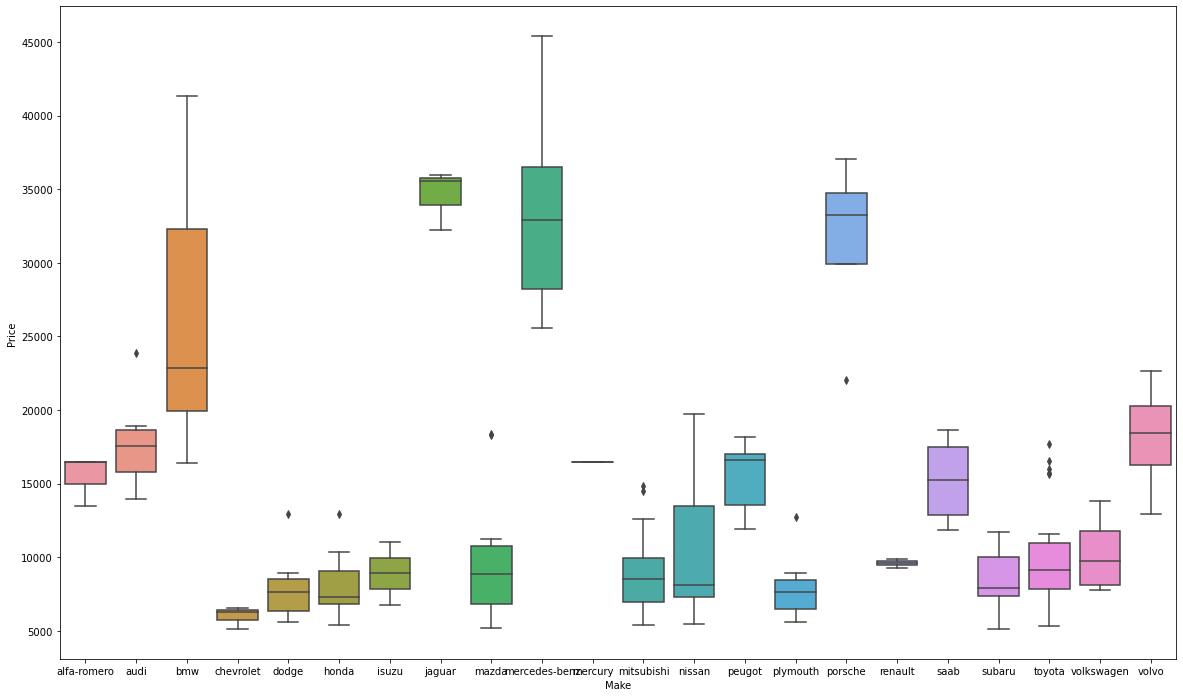

In [22]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'Make', y = 'Price', data = data)

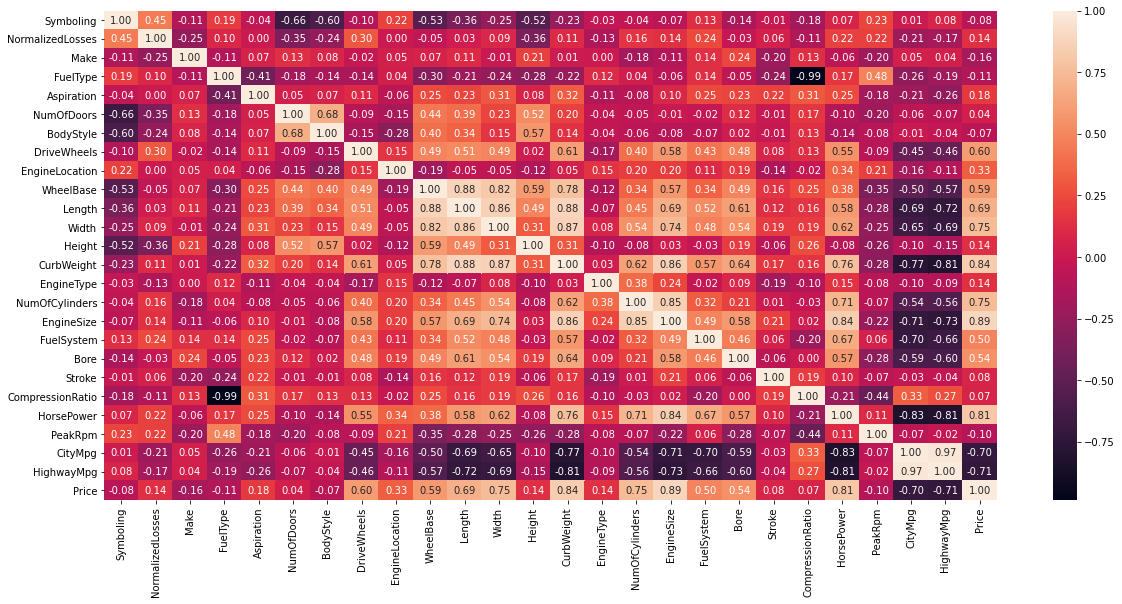

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1=data
data1.Make = le.fit_transform(data1.Make)
data1.FuelType = le.fit_transform(data1.FuelType)
data1.Aspiration = le.fit_transform(data1.Aspiration)
data1.NumOfDoors = le.fit_transform(data1.NumOfDoors)
data1.BodyStyle = le.fit_transform(data1.BodyStyle)
data1.DriveWheels = le.fit_transform(data1.DriveWheels)
data1.EngineLocation= le.fit_transform(data1.EngineLocation)
data1.EngineType= le.fit_transform(data1.EngineType)
data1.FuelSystem= le.fit_transform(data1.FuelSystem)

data1
corr = data1.corr()
plt.figure(figsize=(20,9))
PERA = sns.heatmap(corr, annot=True, fmt='.2f')

# Visualizing Price vs. attributes

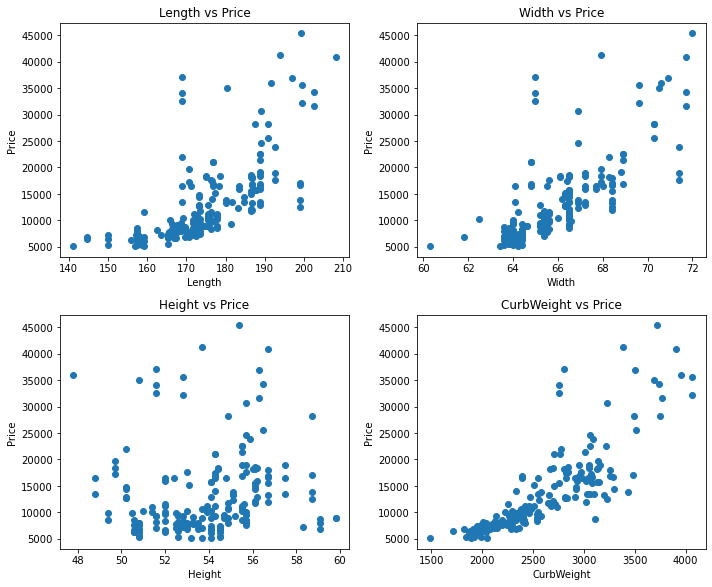

In [24]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Length', 1)
scatter('Width', 2)
scatter('Height', 3)
scatter('CurbWeight', 4)

plt.tight_layout()

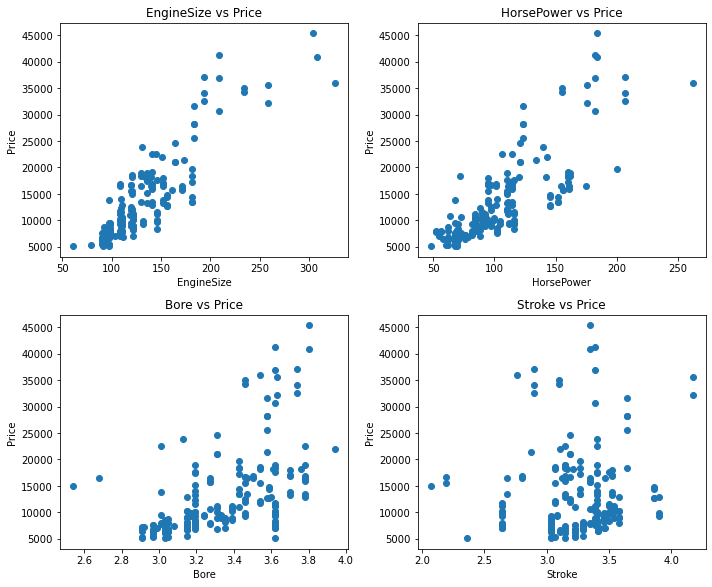

In [25]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('EngineSize', 1)
scatter('HorsePower', 2)
scatter('Bore', 3)
scatter('Stroke', 4)

plt.tight_layout()

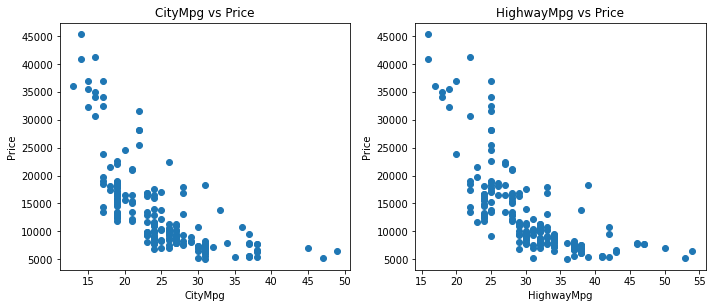

In [26]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('CityMpg', 1)
scatter('HighwayMpg', 2)

plt.tight_layout()

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


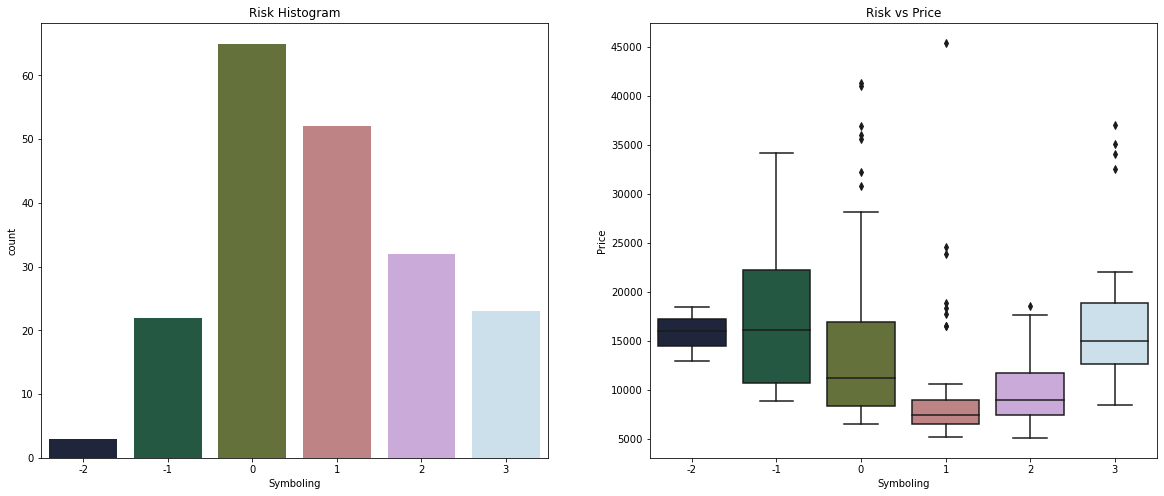

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Risk Histogram')
sns.countplot(data.Symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Risk vs Price')
sns.boxplot(x=data.Symboling, y=data.Price, palette=("cubehelix"))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


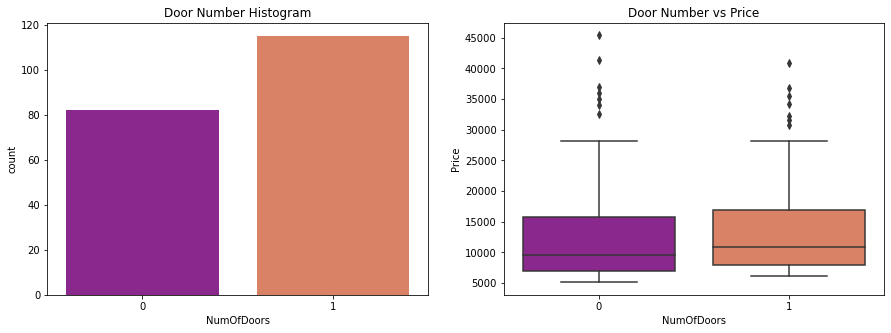

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.NumOfDoors, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.NumOfDoors, y=data.Price, palette=("plasma"))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


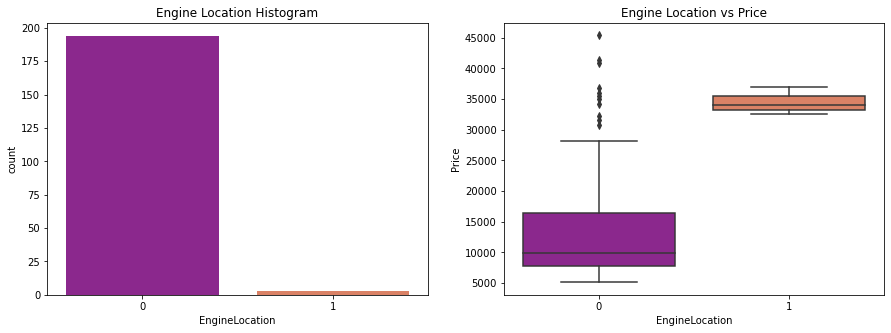

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine Location Histogram')
sns.countplot(data.EngineLocation, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=data.EngineLocation, y=data.Price, palette=("plasma"))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


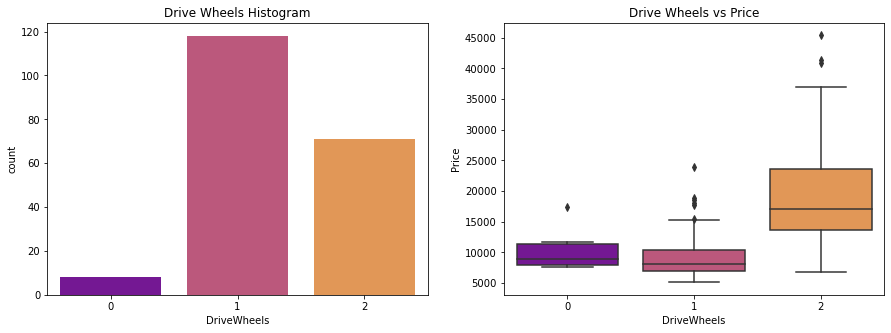

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Drive Wheels Histogram')
sns.countplot(data.DriveWheels, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Drive Wheels vs Price')
sns.boxplot(x=data.DriveWheels, y=data.Price, palette=("plasma"))

plt.show()

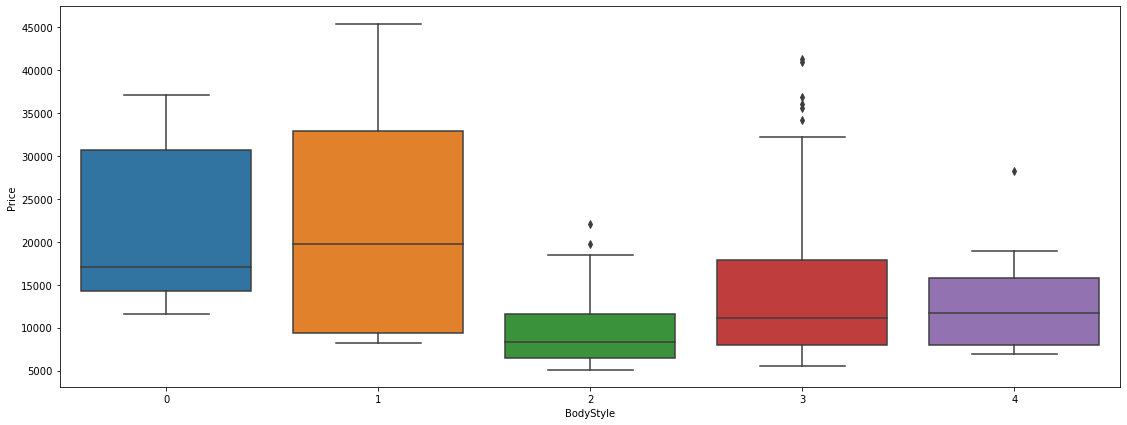

In [31]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="BodyStyle", y="Price", data=data)

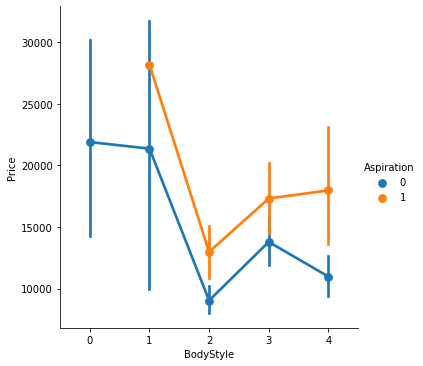

In [32]:
sns.catplot(data=data, x="BodyStyle", y="Price", hue="Aspiration" ,kind="point")

# LINEAR REGRESSION

In [33]:
from sklearn import linear_model as lm
from scipy.stats import pearsonr

In [34]:
# Calculate a Pearson correlation coefficient and the p-value for testing non-correlation
pearsonr(data['HorsePower'], data['Price'])

(0.8100620786296702, 4.329645571451276e-47)

In [35]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource

# enable output to notebook cell
output_notebook()

Loading BokehJS ...

In [36]:
source = ColumnDataSource(data=dict(
    x=data['HorsePower'],
    y=data['Price'],
    make=data['Make']
))

# add tooltips to show infos for each datapoint
tooltips = [
    ('Make', '@make'),
    ('HorsePower', '$x'),
    ('Price', '$y{$0}')
]

# create figure
p = figure(plot_width=600, plot_height=400, tooltips=tooltips)
# add axis labels
p.xaxis.axis_label = 'Horsepower'
p.yaxis.axis_label = 'Price'

# show datapoints as circles
p.circle('x', 'y', source=source, size=8, color='blue', alpha=0.5)

# show figure
show(p)

In [37]:
# import machine learning library
from sklearn.model_selection import train_test_split

# split dataset into training data and test data: 75% / 25%
train, test = train_test_split(data, test_size=0.25)

from sklearn import linear_model as lm
model = lm.LinearRegression()
# reshape first array to 2D for .fit() method
training_x = np.array(train['HorsePower']).reshape(-1, 1)
training_y = np.array(train['Price'])

# perform linear fit/regression
model.fit(training_x, training_y)
# turn coefficient array which contains only one number into a number
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print('slope: ', slope, 'intercept: ', intercept)


slope:  171.11424215804377 intercept:  -4481.986977966602


<ipython-input-37-1c234857a191>:16: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  slope = np.asscalar(np.squeeze(model.coef_))


In [38]:
# Add best fit line to figure
from bokeh.models import Slope

best_fit = Slope(gradient=slope, y_intercept=intercept, line_color='red', line_width=3)
p.add_layout(best_fit)
show(p)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# define a function to generate a prediction and then compare the desired metrics
def predict_metrics(lr, x, y):
    pred = lr.predict(x)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    return mae, mse, r2

training_mae, training_mse, training_r2 = predict_metrics(model, training_x, training_y)

# calculate with test data for comparison
test_x = np.array(test['HorsePower']).reshape(-1, 1)
test_y = np.array(test['Price'])
test_mae, test_mse, test_r2 = predict_metrics(model, test_x, test_y)

print('training mean error: ', training_mae, 'training mse: ', training_mse, 'training r2: ', training_r2)
print('test mean error: ', test_mae, 'test mse: ', test_mse, 'test r2: ', test_r2)

training mean error:  3313.451843055241 training mse:  21504363.554807343 training r2:  0.6582153109007344
test mean error:  3509.2630502322268 test mse:  23551295.065915994 test r2:  0.6471175059444931


In [40]:
cols = ['HorsePower', 'EngineSize', 'PeakRpm', 'Length', 'Width', 'Height']
#preprocess the data
for col in cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(subset=['Price', 'HorsePower'], inplace=True)

for col in cols:
    print(col, pearsonr(data[col], data['Price']))

HorsePower (0.8100620786296702, 4.329645571451276e-47)
EngineSize (0.8875082414730268, 1.5525072874560488e-67)
PeakRpm (-0.10430515145860234, 0.14465932367074075)
Length (0.6920432470598123, 2.0498975120633893e-29)
Width (0.7516743560195773, 4.265422015262601e-37)
Height (0.13890741986440797, 0.05157079749867179)


In [41]:
# drop peak-rpm & height from further analysis as they are weakly correlated

# split data into train & test set
model_cols = ['HorsePower', 'EngineSize', 'Length', 'Width']
multi_x = np.column_stack(tuple(data[col] for col in model_cols))
multi_train_x, multi_test_x, multi_train_y, multi_test_y = train_test_split(multi_x, data['Price'], test_size=0.25)

In [42]:
# fit the model
multi_model = lm.LinearRegression()
multi_model.fit(multi_train_x, multi_train_y)
multi_intercept = multi_model.intercept_
multi_coeffs = dict(zip(model_cols, multi_model.coef_))
print('intercept: ', multi_intercept)
print('coefficients: ', multi_coeffs)

intercept:  -43997.823191978954
coefficients:  {'HorsePower': 47.715100173310574, 'EngineSize': 110.09324035015828, 'Length': 50.63487204955608, 'Width': 445.2832392372749}


In [43]:
# calculate error metrics
multi_train_mae, multi_train_mse, multi_train_r2 = predict_metrics(multi_model, multi_train_x, multi_train_y)
multi_test_mae, multi_test_mse, multi_test_r2 = predict_metrics(multi_model, multi_test_x, multi_test_y)

print('training mean error: ', multi_train_mae, 'training mse: ', multi_train_mse, 'training r2: ', multi_train_r2)
print('test mean error: ', multi_test_mae, 'test mse: ', multi_test_mse, 'test r2: ', multi_test_r2)

training mean error:  2522.710703469196 training mse:  12857519.27323785 training r2:  0.8023815571798536
test mean error:  2072.614073849262 test mse:  7530506.163924342 test r2:  0.876591272217375


# Multiple Linear Regression using relevant attributes

In [44]:
lm_build_dim = lm.LinearRegression()

In [45]:
lm_data_chars = lm.LinearRegression()

In [46]:
cdf = data1[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','Price','DriveWheels','EngineLocation','FuelSystem']]
cdf.head()

,EngineSize,CurbWeight,HorsePower,Width,Length,WheelBase,Bore,Price,DriveWheels,EngineLocation,FuelSystem
0,130,2548,111.0,64.1,168.8,88.6,3.47,13495.0,2,0,4
1,130,2548,111.0,64.1,168.8,88.6,3.47,16500.0,2,0,4
2,152,2823,154.0,65.5,171.2,94.5,2.68,16500.0,2,0,4
3,109,2337,102.0,66.2,176.6,99.8,3.19,13950.0,1,0,4
4,136,2824,115.0,66.4,176.6,99.4,3.19,17450.0,0,0,4


In [47]:
regr = lm.LinearRegression()
x = np.asanyarray(train[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','DriveWheels','EngineLocation','FuelSystem']])
y = np.asanyarray(train[['Price']])
regr.fit(x,y)

print('Coefficients: ', regr.coef_)

Coefficients:  [[ 8.98230201e+01  2.51030129e+00  3.60907118e+01  2.79922469e+02
   1.24285601e+01  2.03048559e+02 -3.34973338e+03  6.29663903e+02
   1.34601503e+04 -1.78943769e+02]]


Prediction

In [48]:
y_= regr.predict(test[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','DriveWheels','EngineLocation','FuelSystem']])
x = np.asanyarray(test[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','DriveWheels','EngineLocation','FuelSystem']])
y = np.asanyarray(test[['Price']])
print('Residual sum squares: %.2f' % np.mean((y_ - y) **2 ))
print('Variance score: %.2f' % regr.score(x,y)) # Explained variance score: 1 is perfect prediction

Residual sum squares: 9868004.19
Variance score: 0.85


explained variance regression score:

If  y^  is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

explainedVariance(y,y^)=1−Var{y−y^}Var{y} 
The best possible score is 1.0, lower values are worse.

Practice

In [49]:
regr = lm.LinearRegression()
x = np.asanyarray(train[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','DriveWheels','EngineLocation','FuelSystem']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','DriveWheels','EngineLocation','FuelSystem']])
x = np.asanyarray(test[['EngineSize','CurbWeight','HorsePower','Width','Length','WheelBase','Bore','DriveWheels','EngineLocation','FuelSystem']])
y = np.asanyarray(test[['Price']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[ 8.98230201e+01  2.51030129e+00  3.60907118e+01  2.79922469e+02
   1.24285601e+01  2.03048559e+02 -3.34973338e+03  6.29663903e+02
   1.34601503e+04 -1.78943769e+02]]
Residual sum of squares: 9868004.19
Variance score: 0.85


In [50]:
for i, row in data1.iterrows():
    predicted_prices = regr.predict([[data1.EngineSize[i],data1.CurbWeight[i],data1.HorsePower[i],data1.Width[i],data1.Length[i],data1.WheelBase[i],data1.Bore[i],data1.DriveWheels[i],data1.EngineLocation[i],data1.FuelSystem[i]]])
    print(predicted_prices)
    

[[10550.83669271]]
[[10550.83669271]]
[[19035.17246499]]
[[11077.24854874]]
[[14539.26723859]]
[[14254.63924279]]
[[17937.9065439]]
[[18214.03968558]]
[[19379.98971148]]
[[10583.04108349]]
[[10583.04108349]]
[[17762.13869181]]
[[17900.20526265]]
[[19834.66993796]]
[[25479.12463587]]
[[26195.24938589]]
[[28708.39147667]]
[[-247.15400572]]
[[6065.00057003]]
[[6188.90393927]]
[[6109.76938289]]
[[6109.76938289]]
[[7950.21835816]]
[[6338.20680009]]
[[6393.43342843]]
[[6393.43342843]]
[[8108.3673393]]
[[12509.02568527]]
[[16040.11275414]]
[[4327.76173446]]
[[5243.48648292]]
[[5080.27249505]]
[[7083.98417707]]
[[7124.14899767]]
[[7994.78393648]]
[[7890.13864546]]
[[10122.76155298]]
[[10255.80752124]]
[[10391.647665]]
[[9806.55748745]]
[[10621.39177274]]
[[10835.99859311]]
[[8733.49027091]]
[[10905.59893985]]
[[34545.51760164]]
[[34545.51760164]]
[[41715.76793227]]
[[6046.26387823]]
[[6071.36689111]]
[[6083.91839755]]
[[6280.03036149]]
[[6125.09519873]]
[[11478.53654384]]
[[11541.29407604]]
[[

Text(0, 0.5, 'y_pred')

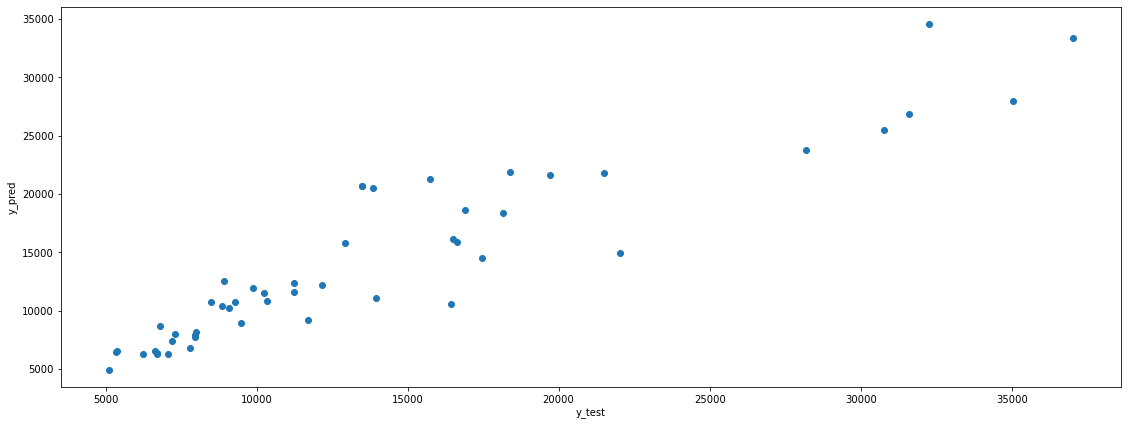

In [51]:
plt.scatter(y, y_)
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Multiple Linear Regression using OLS with all attributes

In [52]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
X1 = data1.drop(['Price'], axis= 'columns')

In [54]:
y1 = data1.Price

In [55]:
X1_sm = sm.add_constant(X1)
model3 = sm.OLS(y1,X1_sm).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     63.70
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.93e-73
Time:                        19:39:53   Log-Likelihood:                -1820.3
No. Observations:                 197   AIC:                             3693.
Df Residuals:                     171   BIC:                             3778.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.473e+04   1.75e+04  

# Multiple linear regression using RFE

In [56]:
df_train, df_test = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
col_list = ['Symboling', 'NumOfDoors', 'WheelBase', 'Length', 'Width','Height', 'CurbWeight', 'NumOfCylinders', 'EngineSize', 'Bore',
            'Stroke', 'CompressionRatio', 'HorsePower', 'PeakRpm', 'CityMpg', 'HighwayMpg', 'Price']

In [58]:
scaler = StandardScaler()

In [59]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

<ipython-input-59-40a2389edab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col_list] = scaler.fit_transform(df_train[col_list])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [60]:
df_train.describe()

,Symboling,NormalizedLosses,Make,FuelType,Aspiration,NumOfDoors,BodyStyle,DriveWheels,EngineLocation,WheelBase,...,EngineSize,FuelSystem,Bore,Stroke,CompressionRatio,HorsePower,PeakRpm,CityMpg,HighwayMpg,Price
count,1.370000e+02,137.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,137.000000,1.370000e+02,...,1.370000e+02,137.000000,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02
mean,6.239940e-17,120.036496,12.080292,0.897810,0.182482,6.969283e-17,2.737226,1.313869,0.014599,1.369545e-15,...,-1.766632e-16,2.525547,-2.042162e-15,-8.468489e-16,1.961124e-16,-2.447353e-16,1.410064e-16,2.479768e-16,1.831463e-16,2.431145e-17
std,1.003670e+00,31.935000,6.521524,0.304009,0.387658,1.003670e+00,0.868315,0.565579,0.120379,1.003670e+00,...,1.003670e+00,1.567502,1.003670e+00,1.003670e+00,1.003670e+00,1.003670e+00,1.003670e+00,1.003670e+00,1.003670e+00,1.003670e+00
min,-2.304031e+00,65.000000,0.000000,0.000000,0.000000,-1.340119e+00,0.000000,0.000000,0.000000,-1.968473e+00,...,-1.614749e+00,0.000000,-2.787345e+00,-3.534094e+00,-7.976361e-01,-1.480872e+00,-2.090312e+00,-1.890385e+00,-2.277727e+00,-1.000593e+00
25%,-5.649001e-01,95.000000,7.000000,1.000000,0.000000,-1.340119e+00,2.000000,1.000000,0.000000,-7.465881e-01,...,-7.190181e-01,1.000000,-9.665540e-01,-3.435617e-01,-4.215221e-01,-8.624354e-01,-6.721692e-01,-7.185172e-01,-8.818833e-01,-7.028336e-01
50%,3.046652e-01,122.000000,12.000000,1.000000,0.000000,7.462025e-01,3.000000,1.000000,0.000000,-3.289820e-01,...,-3.955599e-01,2.000000,-3.830775e-02,1.730007e-01,-2.961508e-01,-1.877778e-01,-1.764181e-02,-4.887872e-02,-1.064147e-01,-3.653058e-01
75%,3.046652e-01,129.000000,19.000000,1.000000,0.000000,7.462025e-01,3.000000,2.000000,0.000000,6.144986e-01,...,3.757637e-01,4.000000,1.068447e+00,5.072470e-01,-1.958538e-01,3.744369e-01,8.550614e-01,7.881694e-01,5.139602e-01,4.231760e-01
max,2.043796e+00,256.000000,21.000000,1.000000,1.000000,7.462025e-01,4.000000,2.000000,1.000000,3.336672e+00,...,4.530958e+00,6.000000,1.711079e+00,2.846971e+00,3.214246e+00,2.988735e+00,3.254995e+00,3.634133e+00,3.460741e+00,4.036937e+00


Model building:

In [61]:
y_train = df_train.pop('Price')
X_train = df_train

Model building using RFE

In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Symboling', False, 8),
 ('NormalizedLosses', False, 11),
 ('Make', False, 7),
 ('FuelType', True, 1),
 ('Aspiration', True, 1),
 ('NumOfDoors', False, 4),
 ('BodyStyle', False, 3),
 ('DriveWheels', True, 1),
 ('EngineLocation', True, 1),
 ('WheelBase', False, 5),
 ('Length', False, 9),
 ('Width', True, 1),
 ('Height', True, 1),
 ('CurbWeight', False, 2),
 ('EngineType', True, 1),
 ('NumOfCylinders', True, 1),
 ('EngineSize', True, 1),
 ('FuelSystem', False, 6),
 ('Bore', False, 10),
 ('Stroke', True, 1),
 ('CompressionRatio', True, 1),
 ('HorsePower', True, 1),
 ('PeakRpm', True, 1),
 ('CityMpg', True, 1),
 ('HighwayMpg', True, 1)]

In [64]:
cols = X_train.columns[rfe.support_]
cols

Index(['FuelType', 'Aspiration', 'DriveWheels', 'EngineLocation', 'Width',
       'Height', 'EngineType', 'NumOfCylinders', 'EngineSize', 'Stroke',
       'CompressionRatio', 'HorsePower', 'PeakRpm', 'CityMpg', 'HighwayMpg'],
      dtype='object')

Model 1:

In [65]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [66]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     83.83
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.99e-56
Time:                        19:39:55   Log-Likelihood:                -27.741
No. Observations:                 137   AIC:                             87.48
Df Residuals:                     121   BIC:                             134.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2944      0.853  

# Decision tree model

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X2 = cdf.drop(columns= ['Price'])
y2 = cdf.Price

model_tree = DecisionTreeClassifier()
model_tree.fit(X2,y2)
predictions = model_tree.predict(X2)

score = accuracy_score(y2, predictions)
score 

0.9441624365482234

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
y_pred = regressor.predict(X_test)

In [71]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
117,18150.0,11549.0
13,21105.0,20970.0
186,8495.0,8195.0
81,8499.0,6989.0
157,7198.0,8358.0
67,25552.0,28248.0
125,22018.0,15985.0
194,12940.0,15985.0
99,8949.0,9549.0
19,6295.0,6575.0


# Risk

In [72]:
regr2 = lm.LinearRegression()
x2 = np.asanyarray(train[['NormalizedLosses','PeakRpm','WheelBase','Length','Width','Height','CurbWeight','NumOfCylinders','EngineSize','Bore','Stroke','CompressionRatio','HorsePower']])
y2 = np.asanyarray(train[['Symboling']])
regr.fit(x2,y2)

print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 1.53150798e-02 -1.12504225e-04 -1.76126162e-01  4.18445758e-04
   1.78957471e-01  2.19751713e-02 -2.37263458e-04 -9.81610440e-01
   2.94869339e-02 -1.57715629e+00 -3.79968635e-01 -1.41170447e-02
   7.08143098e-03]]
Intercept:  [10.9676979]


In [73]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size= 0.2, random_state = 0)

In [74]:
regressor = lm.LinearRegression()
regressor.fit(x2_train,y2_train)

LinearRegression()

In [75]:
regressor.score(x2_train,y2_train)

0.6264095304476104

In [76]:
y2_pred = regressor.predict(x2_test)

In [77]:
y2_pred.round()

array([[ 0.],
       [-0.],
       [ 1.],
       [ 3.],
       [ 1.],
       [ 1.],
       [-1.],
       [-0.],
       [-1.],
       [ 0.],
       [ 2.],
       [-1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [-0.],
       [ 0.],
       [ 2.],
       [ 1.],
       [ 0.],
       [ 1.]])

In [78]:
y2_test

array([[ 0],
       [-1],
       [ 1],
       [ 2],
       [ 0],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 0],
       [ 3],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 2],
       [ 0],
       [ 0],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [-1],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 2]], dtype=int64)

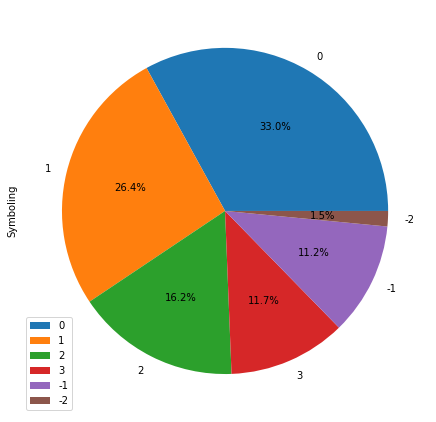

<Figure size 1368x504 with 0 Axes>

In [79]:
# Let's see the count of automobile in each category and percent share of each category.
df_sym = pd.DataFrame(data['Symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

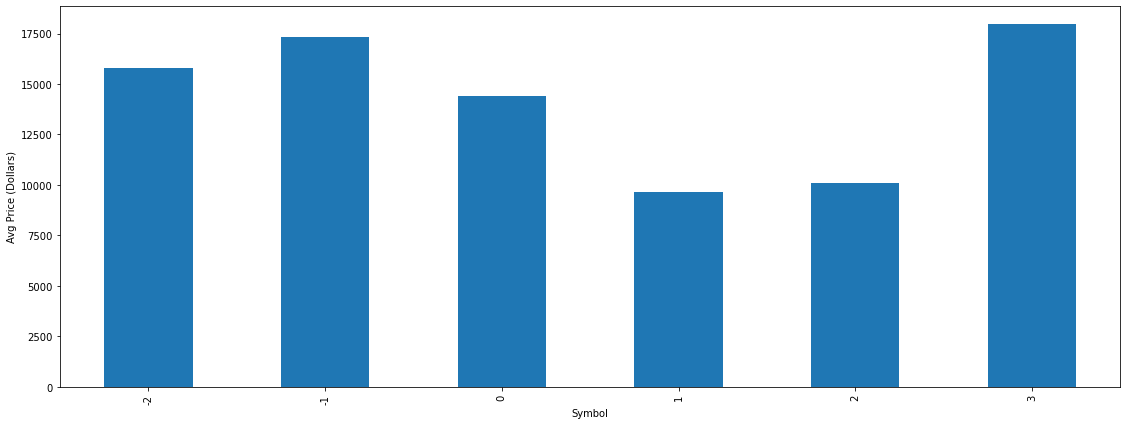

In [80]:
# Let's see average price of cars in each symbol category.
plt1 = data[['Symboling','Price']].groupby("Symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()